In [1]:
from maelzel.core import *

Chain([‹4C 4E 1♩ offset=0.5›, ‹4D 4Eb gliss=4G,4F# mf›, Chain([4E:0.333♩:offset=0.5, 4F:0.667♩], offset=3)])
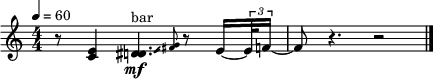

In [2]:
from maelzel.core import *
chain = Chain([
    "4C,4E:1:offset=0.5",
    "4D,4Eb:mf:label=bar:gliss=4g,4f#",
     Chain(["4E:1/3:offset=0.5", "4F:2/3"], offset=3)
])

# print(chain.resolveDur())

chain.dump()
chain

In [3]:
chain.write('~/tmp/foo2.ly')
! cat ~/tmp/foo2.ly

\version "2.22.2"

\header { tagline = ##f }
#(set-global-staff-size 18.0)
#(set-default-paper-size "a4" 'portrait)
\paper {
  left-margin = 4\mm
  right-margin = 4\mm
  top-margin = 4\mm
  bottom-margin = 4\mm
}


glissandoSkipOn = {
  \override NoteColumn.glissando-skip = ##t
  % \hide NoteHead
  \override NoteHead.no-ledgers = ##t
}

glissandoSkipOff = {
  \revert NoteColumn.glissando-skip
  % \undo \hide NoteHead
  \revert NoteHead.no-ledgers
}

% adapted from http://lsr.di.unimi.it/LSR/Item?id=784

% Define the alterations as fraction of the equal-tempered whole tone.
#(define-public SEVEN-E-SHARP  7/8)
#(define-public SHARP-RAISE    5/8)
#(define-public SHARP-LOWER    3/8)
#(define-public NATURAL-RAISE  1/8)
#(define-public NATURAL-LOWER -1/8)
#(define-public FLAT-RAISE    -3/8)
#(define-public FLAT-LOWER    -5/8)
#(define-public SEVEN-E-FLAT  -7/8)

% Note names can now be defined to represent these pitches in our
% Lilypond input.  We extend the list of Dutch note names:
arrowe

In [3]:
chain.play()



--Csound version 6.19 (double samples) Dec 20 2022
[commit: cd2cbc6494d1cefaaa357abf7c94e54e4d2e2868]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analogue Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analogue Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=6)
    Synth(𝍪 preset.sin:501.0002, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=60 p19=0.515178 p20=1 ...)
    Synth(𝍪 preset.sin:501.0003, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=64 p19=0.515178 p20=1 ...)
    Synth(𝍪 preset.sin:501.0004, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=62 p19=0.343838 p20=1.5 ...)
    Synth(𝍪 preset.sin:501.0005, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=63 p19=0.343838 p20=1.5 ...)
    Synth(𝍪 preset.sin:501.0006, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=64 p19=0.343838 p20=0.5 ...)
    Synth(𝍪 preset.sin:501.0007, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=65 p19=0.343838 p20=1 ...)

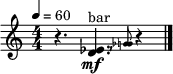

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=2)
    Synth(𝍪 preset.sin:501.0006, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=62 p19=0.343838 p20=1.5 ...)
    Synth(𝍪 preset.sin:501.0007, p4=0 idataidx_:5=17 inumbps:6=2 ibplen:7=3 igain:8=0.707107 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=63 p19=0.343838 p20=1.5 ...)

In [5]:
n = chain[1]
n.show()
n.play(start=n.absoluteOffset())


Chain([Rest:0.5♩, ‹4C 4E 1♩›, ‹4D 4Eb gliss=4G,4F# mf›, Chain([Rest:0.5♩, 4E:0.333♩, 4F:0.667♩], offset=3)])
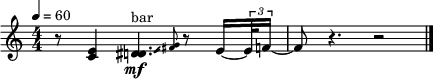

In [6]:

chain.fillGaps()
chain.dump()
chain.removeRedundantOffsets()
# chain.stack()
chain.dump()
chain

Chain([Rest:0.5♩, ‹4C 4E 1♩›, ‹4D 4Eb 1.5♩ gliss=4G,4F# mf›, Rest:0.5♩, 4E:0.333♩, 4F:0.667♩])
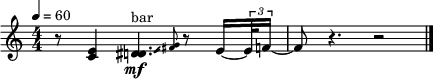

In [7]:
flat = chain.flat()
flat.removeRedundantOffsets()
flat.dump()
flat

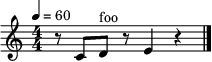

In [8]:
ch = Chain([
    '4C:0.5', 
    '4D:0.5:label=foo', 
    Chain(['4E:1:offset=0.5'])
], offset=0.5)
ch.show()


4C:0.5♩
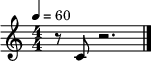

In [9]:
n = ch[0]
n

In [6]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
3/4, 72
''')

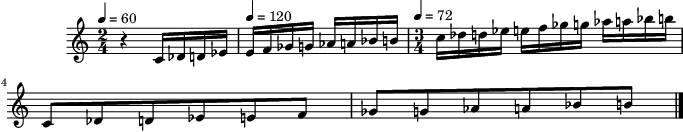

In [7]:
notes = [Note(m, 0.25) for m in range(60, 84)]
sc = Chain(notes, offset=1)
notes2 = [Note(m, 0.5) for m in range(60, 72)]
sc2 = Chain(notes2)
sc.append(sc2)
# sc.stack()
with struct:
    # sc.play()
    sc.asVoice().show()


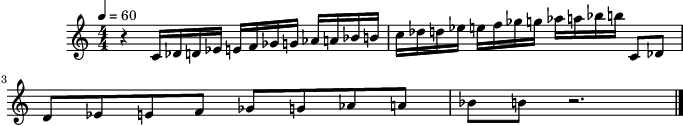

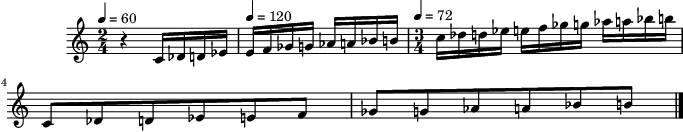

In [8]:
sc.flat().show()
with struct:
    sc.flat().show()

Score(4 voices)
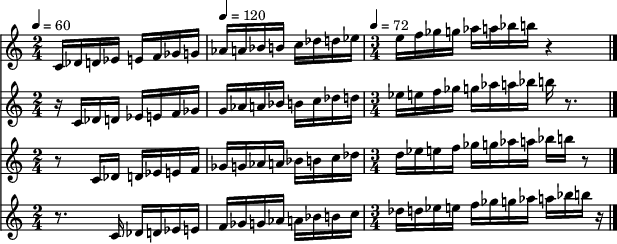

In [9]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())
sco.append(scale.asVoice().timeShift(0.25))
sco.append(scale.asVoice().timeShift(1/2))
sco.append(scale.asVoice().timeShift(3/4))
sco

Score(4 voices)
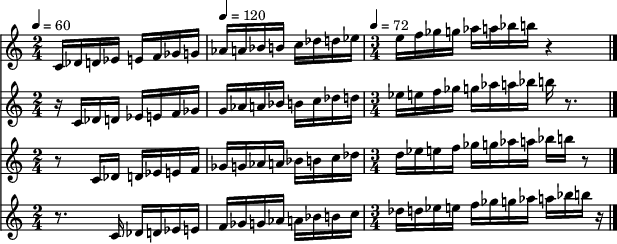

In [20]:
sco[0][0].setPlay(instr='saw', gain=0.1, position=0)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.setPlay(position=0.5)

Voice([4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, …], offset=0)
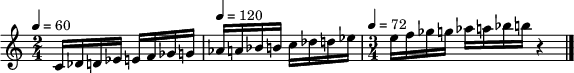

In [11]:
sco[0][0].parent

In [25]:
sco.play(gain=0.2, sustain=0.1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset.saw:501.0022, p4=0 idataidx_:5=19 inumbps:6=3 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=60 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset.sin:502.0942, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=61 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.sin:502.0943, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=62 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.saw:501.0023, p4=0 idataidx_:5=19 inumbps:6=3 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=63 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset.sin:502.0944, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=64 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.sin:502.0945, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=65 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.sin:502.0946, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=66 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.sin:502.0947, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=67 p19=0.515178 p20=0.25 ...)
    Synth(𝍪 preset.sin:502.0948, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=68 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0949, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=69 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.095, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=70 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0951, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=71 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0952, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=72 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0953, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=73 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0954, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=74 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0955, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.5 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 p17=0 p18=75 p19=0.515178 p20=0.125 ...)
    Synth(𝍪 preset.sin:502.0956, p4=0 idataidx_:5=17 inumbps:6=3 ibplen:7=3 igain:8=0.2 ichan:9=1 ipos:10=0.